# Вариант 1

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Загрузить файл с информацией о диабетах и построить модель классификации на основе имеющихся данных.

In [68]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/KR/data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


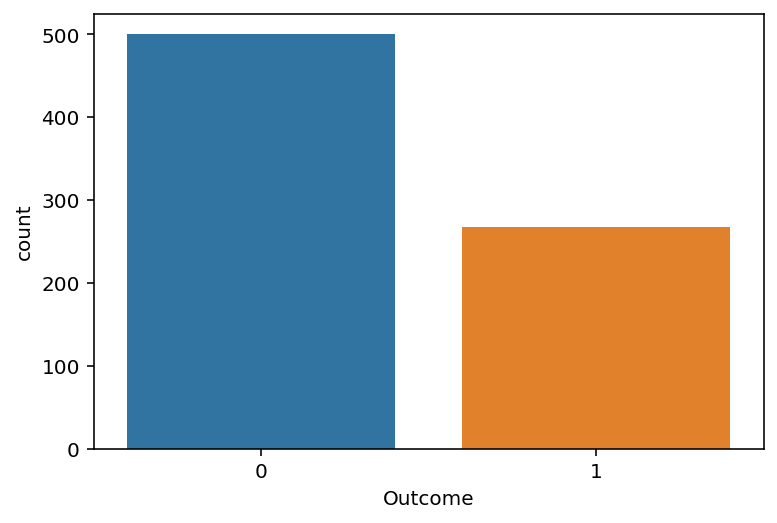

In [70]:
sns.countplot(x = 'Outcome', data=df)

Кол-во людей с диабетом и без (0 - без диабета, 1 - с диабетом):

In [71]:
print(df.Outcome.value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [73]:
df['Outcome'] = df['Outcome'].astype('category')
encode_map = {
    'With': 1,
    'No': 0
}

df['Outcome'].replace(encode_map, inplace=True)

In [74]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

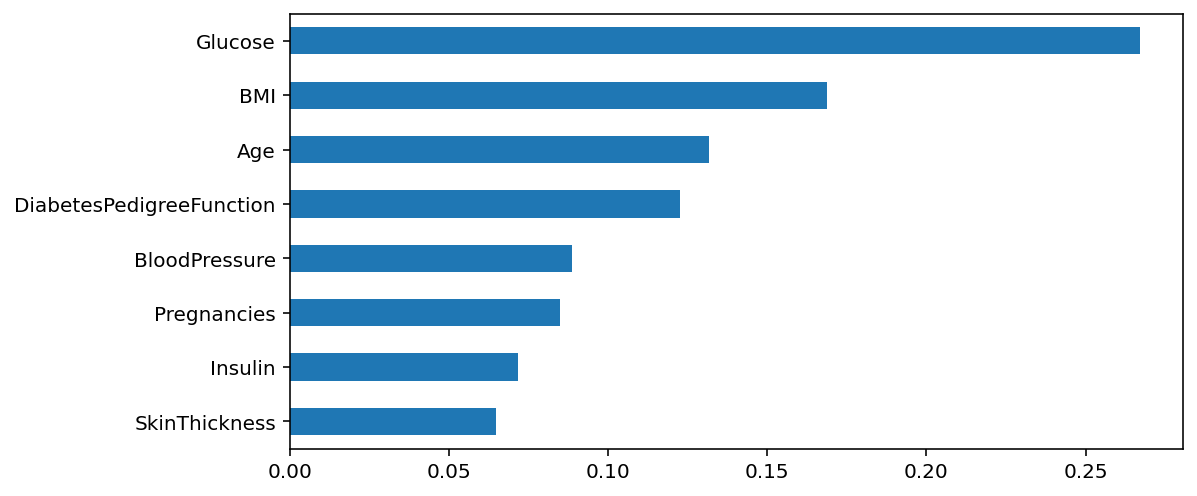

In [39]:
import matplotlib as plt
from sklearn.ensemble import RandomForestClassifier

X, y = df.drop('Outcome', axis=1), df['Outcome']
rfc = RandomForestClassifier(random_state=seed, n_estimators=100)
rfc_model = rfc.fit(X, y)
(pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(8).plot(kind='barh', figsize=[8,4]).invert_yaxis())

Train/Test 80:20

In [40]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

#80:20 train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (614, 8)
y_train (614,)
X_test (154, 8)
y_test (154,)


Конечный ответ:

Accuracy, Precision, Recall, F1-score

In [52]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

def baseline_report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    y_pred = model.predict(X_test)
    logloss      = log_loss(y_test, y_pred)

    df_model = pd.DataFrame({'Model'        : [name],
                             'Accuracy'     : [accuracy],
                             'Precision'    : [precision],
                             'Recall'       : [recall],
                             'F1-score'      : [f1score]
                             })   
    return df_model

logit = LogisticRegression()

df_model = baseline_report(logit, X_train, X_test, y_train, y_test, 'LogisticRegression')
df_model

,model,accuracy,precision,recall,F1-score
0,LogisticRegression,0.786592,0.755764,0.574529,0.65203


# Конечный овтет выше. Забыл, что нужно писать свою модель. И начал заново писать код создавая модель, но не успел. 

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

(В конце вашего ноутбука укажите следующие данные)

По задачам классификации:

1.  Вывести метрики классификации на тестовом множестве: accuracy, precision, recall и f1-score(для бинарной) и метрик качества для каждого класса, в случае использования датасета с лицами.
2.  Обосновать выбранное соотношение train/test на основе построения кривых обучения (или понятного вывода результатов эксперимента) 



По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

